In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Convert the TXT file to CSV
input_txt_file = "data.txt"
output_csv_file = "data.csv"

In [3]:
# Define the header for the CSV file
header = [
    "DateTime", "StepIndex", "StepHeading", "StepDistanceX", "StepDistanceY", "StepDistance",
    "StepTime", "StepAmplitude", "StepDutyCycle", "StepRatio", "Altitude", "Confidence",
    "AltitudeOffset", "BatteryLevel", "RawGyroX", "RawGyroY", "RawGyroZ", "RawAccelX",
    "RawAccelY", "RawAccelZ", "RawCompassX", "RawCompassY", "RawCompassZ",
    "CorrectedGyroX", "CorrectedGyroY", "CorrectedGyroZ", "CorrectedAccelX",
    "CorrectedAccelY", "CorrectedAccelZ", "CorrectedCompassX", "CorrectedCompassY",
    "CorrectedCompassZ", "LinearAccelX", "LinearAccelY", "LinearAccelZ"
]


In [4]:

# Open the input and output files
with open(input_txt_file, "r") as f_in, open(output_csv_file, "w", newline="") as f_out:
    # Create a CSV writer object
    writer = csv.writer(f_out)
    
    # Write the header row
    writer.writerow(header)
    
    # Read each line from the input file
    for line in f_in:
        # Split the line by spaces
        parts = line.strip().split()
        
        # Extract date and time
        date_parts = parts[0].split("/")
        time_parts = parts[1].split(":")
        
        # Ensure date and time parts are valid
        if len(date_parts) == 3 and len(time_parts) == 3:
            # Combine date and time into proper format
            date_time = f"{date_parts[0]}/{date_parts[1]}/{date_parts[2]} {time_parts[0]}:{time_parts[1]}:{time_parts[2]}"
            
            # Extract the rest of the data
            data = parts[2:]
            
            # Split the data separated by commas into separate columns
            new_data = []
            for item in data:
                new_data.extend(item.split(","))
            
            # Combine date, time, and remaining data into a single row
            row = [date_time] + new_data
            
            # Write the row to the CSV file
            writer.writerow(row)
        else:
            print("Skipping invalid line:", line)

print("CSV conversion completed.")

Skipping invalid line: # Data format: "%int(Month)/%int(Day)/%int(Year) %int(Hours):%int(Minutes):%float(Seconds) %float(StepIndex),%float(StepHeading),%float(StepDistanceX),%float(StepDistanceY),%float(StepDistance),%float(StepTime),%float(StepAmplitude),%float(StepDutyCucle),%float(StepRatio),%float(Altitude),%float(Confidence),%float(AltitudeOffset) %int(BatteryLevel) %float(RawGyroX),%float(RawGyroY),%float(RawGyroZ) %float(RawAccelX),%float(RawAccelY),%float(RawAccelZ) %float(RawCompassX),%float(RawCompassY),%float(RawCompassZ) %float(CorrectedGyroX),%float(CorrectedGyroY),%float(CorrectedGyroZ) %float(CorrectedAccelX),%float(CorrectedAccelY),%float(CorrectedAccelZ) %float(CorrectedCompassX),%float(CorrectedCompassY),%float(CorrectedCompassZ) %float(LinearAccelX),%float(LinearAccelY),%float(LinearAccelZ)"

CSV conversion completed.


In [6]:
# Step 2: Read the CSV file and process the trajectory data
input_csv_file = "data.csv"
#input_csv_file = "data.csv"
# Create lists to store trajectory points
trajectory_x = [0]
trajectory_y = [0]
step_x_arr = []
step_y_arr = []
trajectory_heading = []
# Initialize position variables
x_position = 0
y_position = 0
total_distance = 0

In [9]:
reader

In [8]:
# Open the CSV file and read data
with open(input_csv_file, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    #print('length: ',len(reader))
    for row in reader:
        # Extract parameters from each row
        step_heading = float(row['StepHeading'])
        step_distance_x = float(row['StepDistanceX'])
        step_distance_y = float(row['StepDistanceY'])
        step_distance = float(row['StepDistance'])

        # Calculate displacement components along X and Y axes
        displacement_x = step_distance_x #* step_distance
        displacement_y = step_distance_y #* step_distance
        
        # Update position
        x_position += displacement_x
        y_position += displacement_y
        
        # Add new position to trajectory
        trajectory_x.append(x_position)
        trajectory_y.append(y_position)
        step_x_arr.append(step_distance_x)
        step_y_arr.append(step_distance_y)
        trajectory_heading.append(step_heading)
        # Update total distance walked
        total_distance += step_distance

In [10]:
len(trajectory_x)

10300

In [69]:
# Reflect points across X-axis
reference_y = 2 * max(trajectory_y)  # Reference value
trajectory_y_reflected = [reference_y - y for y in trajectory_y]

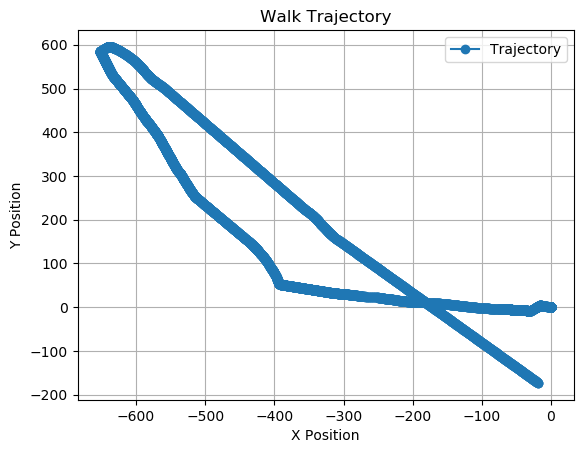

In [17]:
# Plot trajectory
s=7000
#plt.plot(trajectory_x, trajectory_y, marker='o', label='Trajectory')
plt.plot(trajectory_x[:s], trajectory_y[:s], marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.legend()
plt.show()

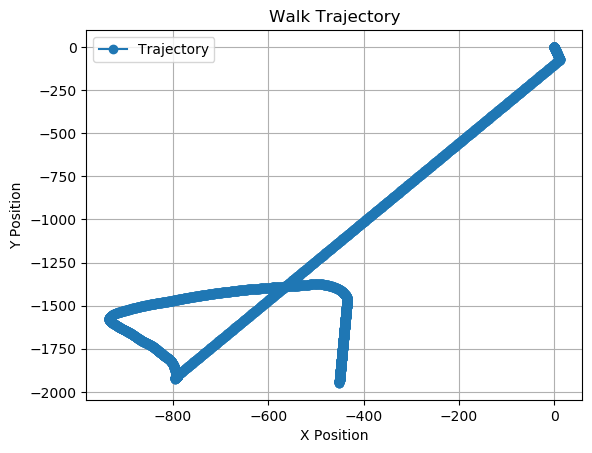

In [65]:
# Plot trajectory
s=3000
#plt.plot(trajectory_x, trajectory_y, marker='o', label='Trajectory')
plt.plot(trajectory_x[:s], trajectory_y[:s], marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.legend()
plt.show()

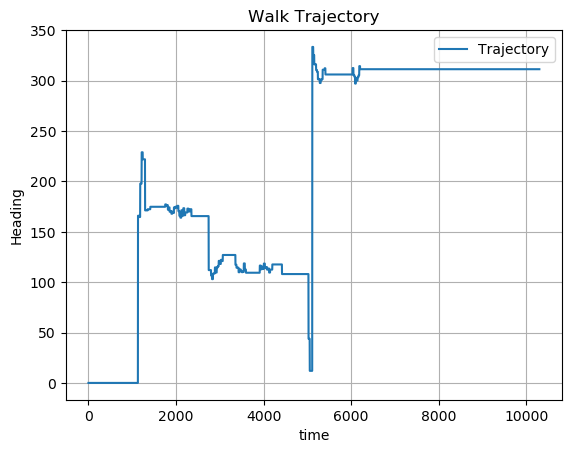

In [18]:
plt.plot(np.array(trajectory_heading), label='Trajectory')

plt.title('Walk Trajectory')
plt.xlabel('time')
plt.ylabel('Heading')
plt.grid(True)
plt.legend()
plt.show()

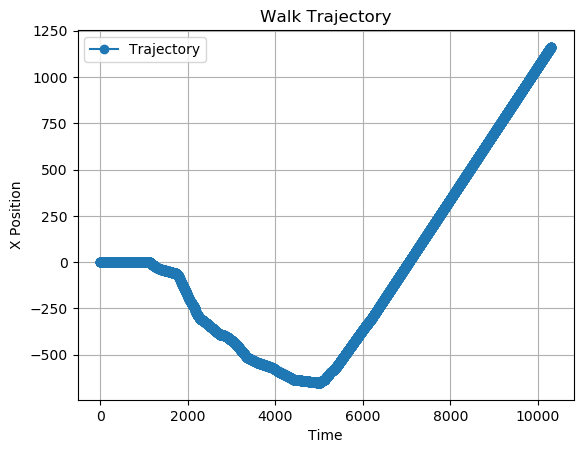

In [19]:
plt.plot(trajectory_x, marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('Time')
plt.ylabel('X Position')
plt.grid(True)
plt.legend()
plt.show()

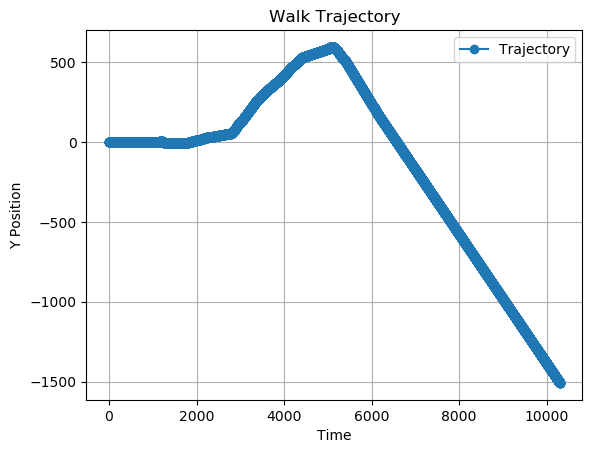

In [20]:
plt.plot(trajectory_y, marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('Time')
plt.ylabel('Y Position')
plt.grid(True)
plt.legend()
plt.show()

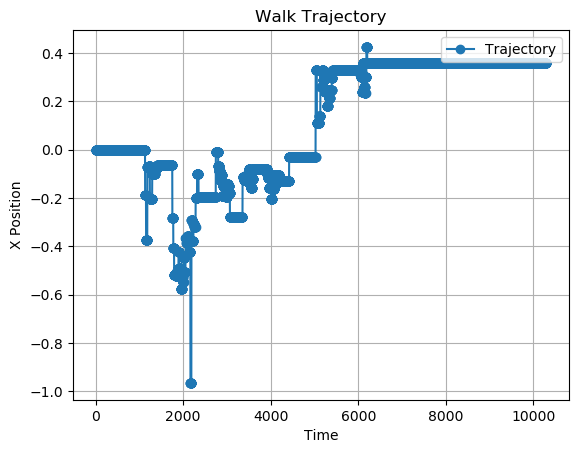

In [21]:
plt.plot(step_x_arr, marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('Time')
plt.ylabel('X Position')
plt.grid(True)
plt.legend()
plt.show()

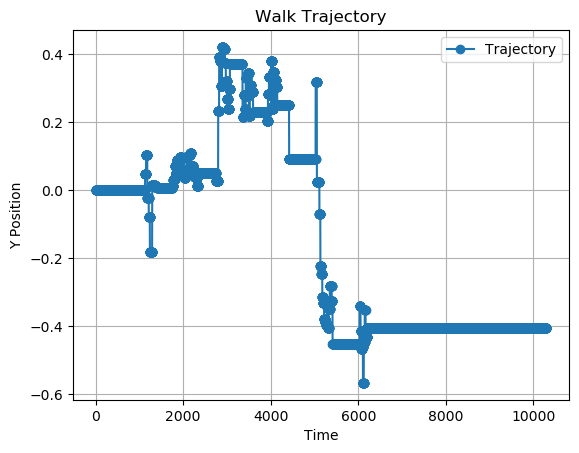

In [22]:
plt.plot(step_y_arr, marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('Time')
plt.ylabel('Y Position')
plt.grid(True)
plt.legend()
plt.show()